# **Important Liberary**
 Run this cell First

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 7.2MB/s 
     |████████████████████████████████| 133kB 34.4MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 174kB 28.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=c13707bf8a413e207ad7efab6e5ab5f198e9e6ea4917e746df24b110f0049426
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=5d19f1f6327e672106c771aae069021274b2aaea89813ee5de4efc88cea422b7
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 7.7MB/s 
     |████████████████████████████████| 1.2MB 47.5MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 143kB 51.2MB/s 
     |████████████████████████████████| 112kB 53.5MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for alembic: filename=alembic-1.6.2-py2.py3-none-any.whl size=164219 sha256=02288215b9f9f6da07a6a19d06fcd9dafc2bb78d011ac938cfe6806c3c247b61
  Stored in directory: /root/.cache/pip/wheels/a5/63/44/db29401e49ef5331c163b591f12a465c40af864bfa888dabd2
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=8bf14166438505c639ea0b0a862adda1ac0f11e0c419bd4c07b752cfd9be9c08
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built alembic pyperclip


In [ ]:
!pip install tqdm
!pip install vit_pytorch

In [ ]:
from __future__ import print_function
import argparse
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import wandb
import optuna
from tqdm import tqdm
from vit_pytorch import ViT

In [2]:
# 0. Clone, install & configure some software

! git clone https://github.com/asyml/vision-transformer-pytorch
! pip install dotmap

import sys
sys.path.append("vision-transformer-pytorch")
sys.path.append("vision-transformer-pytorch/src")

Cloning into 'vision-transformer-pytorch'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 154 (delta 71), reused 115 (delta 32), pack-reused 0
Receiving objects: 100% (154/154), 185.68 KiB | 5.46 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [3]:
# 1. Generic imports

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Torch requires specifying where computation happens
import torch.nn as nn
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

import os
import torch
import gc; 
import torch.nn as nn
import numpy as np

from dotmap import DotMap

In [4]:
# 2. Imports from Vision Transformer repository

from utils import setup_device, accuracy, MetricTracker, TensorboardWriter
from src.model import VisionTransformer
from src.config import get_b16_config, get_train_config
from src.checkpoint import load_checkpoint
from src.data_loaders import *

In [5]:
import tensorflow as tf
tf.random.set_seed(42)
print(tf.__version__)

2.4.1


In [6]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"
device

'cpu'

In [7]:
# 2. Imports from Vision Transformer repository

from utils import setup_device, accuracy, MetricTracker, TensorboardWriter
from src.model import VisionTransformer
from src.config import get_b16_config, get_train_config
from src.checkpoint import load_checkpoint
from src.data_loaders import *
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
#import tensorflow_addons as tfa

import numpy as np
np.random.seed(42)

ModuleNotFoundError: ignored

#**Implementing ViT on Dataset Used in Paper**
 * Dataset : CIFAR100


## Simple Covolutional Neural Network Implementation
This is not part of papaer implementation. I have trained a simple traditional convolutional neural network just for comparison purpose. 


In [9]:
# 1. Visualize dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## WRITEME Show first 4 images and their labels. ##


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
# 2. Define the model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 =nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
#assert output.shape[-1] == 10
print("Congratulations!")

Congratulations!


In [11]:
device

'cpu'

In [12]:
# 3. Train the network

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data


        # Training pass
        optimizer.zero_grad()
        
        output = net(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()

        ## WRITEME ##

        # print statistics
        running_loss += loss.item()
        if i % 6000 == 5999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 6000))
            running_loss = 0.0

print('Finished Training')

[1,  6000] loss: 2.303
[1, 12000] loss: 2.303
[2,  6000] loss: 2.304
[2, 12000] loss: 2.303
[3,  6000] loss: 2.303
[3, 12000] loss: 2.303
[4,  6000] loss: 2.303
[4, 12000] loss: 2.303
[5,  6000] loss: 2.303
[5, 12000] loss: 2.303
Finished Training


In [13]:
# 4. Visualize predictions

dataiter = iter(testloader)
images, labels = dataiter.next()
outputs=net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  truck truck truck truck


In [14]:
# 5. Calculate accuracy 

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

#assert correct / total > 0.5
print("Congratulations!")

Accuracy of the network on the 10000 test images: 10 %
Congratulations!


## Training Visual Trasformer on CIFAR100

In [ ]:
!nvidia-smi

Tue May 18 20:27:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 686kB 9.1MB/s 


Loading Dataset

In [ ]:
num_classes = 100
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

169009152/169001437 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) - y_test shape: (10000, 1)


Hyper-Parameters

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # Final Image Size
patch_size = 6  # Patch Dimension
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers 

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        layers.experimental.preprocessing.Resizing(image_size, image_size),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(factor=0.02),
        layers.experimental.preprocessing.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def multilayer_perceptron(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

 Implementing patch creation as a layer

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

* **Let's display patches for a sample image**

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


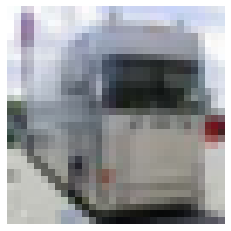

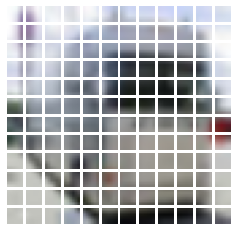

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

 Implement the Patch Encoding Layer

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

Build the ViT model

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)

    augmented = data_augmentation(inputs)

    patches = Patches(patch_size)(augmented)

    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)


    for _ in range(transformer_layers):

        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
   
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
     
        x2 = layers.Add()([attention_output, encoded_patches])
   
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
       
        x3 = multilayer_perceptron(x3, hidden_units=transformer_units, dropout_rate=0.1)
      
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = multilayer_perceptron(representation, hidden_units=mlp_head_units, dropout_rate=0.5)

    logits = layers.Dense(num_classes)(features)

    model = keras.Model(inputs=inputs, outputs=logits)
    return model

 Compile, Train, and Evaluate the model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

In [ ]:
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
176/176 [==============================] - 77s 370ms/step - loss: 4.9261 - accuracy: 0.0270 - top-5-accuracy: 0.1043 - val_loss: 3.9316 - val_accuracy: 0.0978 - val_top-5-accuracy: 0.3040
Epoch 2/100
176/176 [==============================] - 65s 368ms/step - loss: 4.0164 - accuracy: 0.0818 - top-5-accuracy: 0.2629 - val_loss: 3.5617 - val_accuracy: 0.1590 - val_top-5-accuracy: 0.4110
Epoch 3/100
176/176 [==============================] - 66s 373ms/step - loss: 3.7463 - accuracy: 0.1220 - top-5-accuracy: 0.3465 - val_loss: 3.4022 - val_accuracy: 0.1904 - val_top-5-accuracy: 0.4636
Epoch 4/100
176/176 [==============================] - 66s 376ms/step - loss: 3.5407 - accuracy: 0.1540 - top-5-accuracy: 0.4063 - val_loss: 3.2162 - val_accuracy: 0.2198 - val_top-5-accuracy: 0.5228
Epoch 5/100
176/176 [==============================] - 67s 380ms/step - loss: 3.3878 - accuracy: 0.1835 - top-5-accuracy: 0.4553 - val_loss: 3.0488 - val_accuracy: 0.2580 - val_top-5-accuracy: 0.5514


Plots

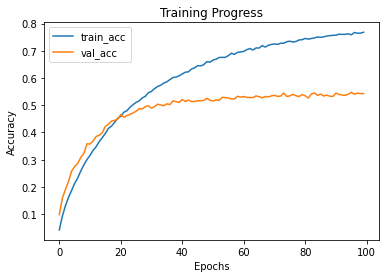

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])

    plt.title("Training Progress")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist(history)

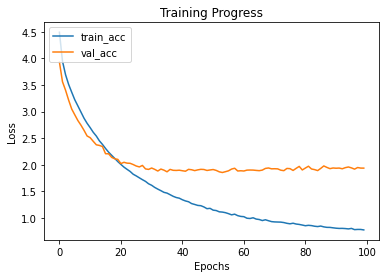

In [ ]:
def plot_hist(hist):
 
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("Training Progress")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(["train_acc", "val_acc", "train_loss", "val_loss"], loc="upper left")
    plt.show()

plot_hist(history)

# **Different Dataset othter than used in Paper**

* Dataset : Fashion-MNIST

##Without Fine Tuining
This is not part of papaer implementation. I have trained a simple traditional convolutional neural network just for comparison purpose. 


In [18]:
trainset = datasets.FashionMNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Processing...
Done!
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Processing...
Done!


In [19]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


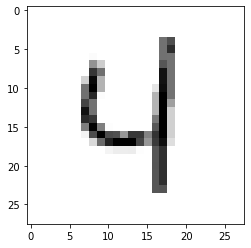

In [20]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

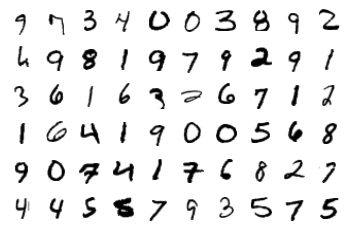

In [21]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [22]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [23]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [24]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 1.5939e-03,  1.5939e-03,  1.5939e-03,  ...,  1.5939e-03,
          1.5939e-03,  1.5939e-03],
        [ 4.9246e-03,  4.9246e-03,  4.9246e-03,  ...,  4.9246e-03,
          4.9246e-03,  4.9246e-03],
        [-3.1848e-03, -3.1848e-03, -3.1848e-03,  ..., -3.1848e-03,
         -3.1848e-03, -3.1848e-03],
        ...,
        [-2.2873e-03, -2.2873e-03, -2.2873e-03,  ..., -2.2873e-03,
         -2.2873e-03, -2.2873e-03],
        [-9.9215e-05, -9.9215e-05, -9.9215e-05,  ..., -9.9215e-05,
         -9.9215e-05, -9.9215e-05],
        [-4.4672e-03, -4.4672e-03, -4.4672e-03,  ..., -4.4672e-03,
         -4.4672e-03, -4.4672e-03]])


In [25]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6419554308279237
Epoch 1 - Training loss: 0.2787572138392722
Epoch 2 - Training loss: 0.21809924438373365
Epoch 3 - Training loss: 0.17922925538441012
Epoch 4 - Training loss: 0.14963648319323816
Epoch 5 - Training loss: 0.12979106135022983
Epoch 6 - Training loss: 0.11368161042743145
Epoch 7 - Training loss: 0.10226062190299953
Epoch 8 - Training loss: 0.09265046852674566
Epoch 9 - Training loss: 0.08424603659709268
Epoch 10 - Training loss: 0.07801686259987417
Epoch 11 - Training loss: 0.07108886949598853
Epoch 12 - Training loss: 0.06656418324732133
Epoch 13 - Training loss: 0.06210777526949721
Epoch 14 - Training loss: 0.056754172416721614

Training Time (in minutes) = 2.7355862895647687


In [27]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

Predicted Digit = 2


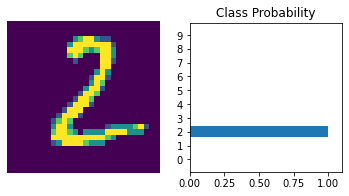

In [28]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [29]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9746


## With Fine Tuining MNIST


In [22]:
#device

In [23]:



wandb.init(project='vit_mnist',name='mnist_optuna')

#wandb.save(__file__)
torch.manual_seed(413)
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 128
train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': batch_size}

cuda_kwargs = {'num_workers': 8,
               'pin_memory': True,
               'shuffle': True}
    
train_kwargs.update(cuda_kwargs)
test_kwargs.update(cuda_kwargs)

train_transforms = transforms.Compose(
    [
        transforms.RandomResizedCrop(28),
        
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=(0.2, 2), 
                               contrast=(0.3, 2), 
                               ),
        transforms.RandomAffine(30),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ]
)



dataset1 = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=train_transforms)
dataset2 = datasets.FashionMNIST('../data', train=False,
                   transform=val_transforms)

train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)



def train(model, criterion, device, train_loader, optimizer, epoch):
    model.train()
    for data, target in tqdm(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
    #print('Train Epoch: {} Loss: {:.6f}'.format(
    #    epoch, loss.item()))
    



def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in tqdm(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    val_acc = 100. * correct / len(test_loader.dataset)
    #print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #    test_loss, correct, len(test_loader.dataset),
    #    val_acc))
    
    return val_acc


epochs = 15
gamma = 0.7


def Objective(trial):
    
    dim = trial.suggest_categorical('dim',[32, 64, 128])
    #patch_size = trial.suggest_int('patch_size',7, 14, 7)
    patch_size = 7
    depth = trial.suggest_categorical('depth',[8, 16, 32])
    heads = trial.suggest_categorical('heads',[8, 16, 32])
    mlp_dim = trial.suggest_categorical('mlp_dim',[128, 512, 1024])
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    #print('dim:', dim, 'mlp_dim:',mlp_dim, 'depth:',depth, 'heads:',heads)
    model = ViT(
        dim=dim,
        image_size=28,
        patch_size=patch_size,
        num_classes=10,
        depth=depth, # number of transformer blocks
        heads=heads, # number of multi-channel attention
        mlp_dim=mlp_dim,
        channels=1,
        #dropout=0.2,
    )


    # vanila cnn : 0.96
    # model = Net()
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    # optimizer
    #optimizer = optim.Adam(model.parameters(), lr=0.001)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    
    # scheduler
    scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

    for epoch in range(1, epochs + 1):
        train(model, criterion, device, train_loader, optimizer, epoch)
        val_acc = test(model, device, test_loader)
        scheduler.step()
        
        if 0:
            torch.save(model.state_dict(), "mnist_cnn.pt")
    
        trial.report(val_acc, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    wandb.log({'val_acc': val_acc})        
    return val_acc


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(Objective, n_trials=10)

    pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
    complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    #for key, value in trial.params.items():
    #    print("    {}: {}".format(key, value))

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.



Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning:

The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning:

This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.

[I 2021-05-18 19:00:11,797] A


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


100%|██████████| 79/79 [00:03<00:00, 21.53it/s]
[I 2021-05-18 19:18:47,338] Trial 0 finished with value: 61.75 and parameters: {'dim': 32, 'depth': 32, 'heads': 8, 'mlp_dim': 128, 'optimizer': 'Adam', 'lr': 1.2080564634236953e-05}. Best is trial 0 with value: 61.75.
100%|██████████| 79/79 [00:02<00:00, 28.01it/s]
[I 2021-05-18 19:29:49,073] Trial 1 finished with value: 85.77 and parameters: {'dim': 32, 'depth': 8, 'heads': 32, 'mlp_dim': 512, 'optimizer': 'RMSprop', 'lr': 0.0010002285306457664}. Best is trial 1 with value: 85.77.
100%|██████████| 79/79 [00:03<00:00, 22.24it/s]
[I 2021-05-18 19:42:43,046] Trial 2 finished with value: 52.48 and parameters: {'dim': 128, 'depth': 8, 'heads': 32, 'mlp_dim': 1024, 'optimizer': 'RMSprop', 'lr': 0.01169049393154513}. Best is trial 1 with value: 85.77.
100%|██████████| 79/79 [00:02<00:00, 35.59it/s]
[I 2021-05-18 19:52:58,112] Trial 3 finished with value: 35.31 and parameters: {'dim': 32, 'depth': 8, 'heads': 8, 'mlp_dim': 128, 'optimizer': 'RM

Study statistics: 
  Number of finished trials:  10
  Number of pruned trials:  2
  Number of complete trials:  8
Best trial:
  Value:  88.33
  Params: 
